### Clustering Animals

In [116]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd

from collections import defaultdict

from scipy.cluster import hierarchy

from sklearn.metrics.pairwise import euclidean_distances

###### Load features file

In [5]:
p =open('predicate-matrix-continuous.txt','r')
f = p.readlines()

In [6]:
predicate_matrix_continuous = np.ndarray(shape=(50,85))

i=0
for line in f:
    predicate_matrix_continuous[i] = line.split()
    i+=1
predicate_matrix_continuous

array([[ -1.  ,  -1.  ,  -1.  , ...,   2.35,   9.7 ,   8.38],
       [ 39.25,   1.39,   0.  , ...,  58.64,  20.14,  11.39],
       [ 83.4 ,  64.79,   0.  , ...,  15.77,  13.41,  15.42],
       ..., 
       [ 63.57,  43.1 ,   0.  , ...,  35.95,  28.26,   5.  ],
       [ 55.31,  55.46,   0.  , ...,   5.04,  18.89,  72.99],
       [ 10.22,  21.53,  27.73, ...,   3.96,  14.05,  37.98]])

In [11]:
pred_mat_df = pd.DataFrame(predicate_matrix_continuous)

In [12]:
pred_mat_df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-1.00,-1.00,-1.00,-1.00,12.34,0.00,0.00,0.00,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
1,39.25,1.39,0.00,74.14,3.75,0.00,0.00,0.00,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
2,83.40,64.79,0.00,0.00,1.25,0.00,0.00,0.00,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
3,19.38,0.00,0.00,87.81,7.50,0.00,0.00,0.00,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
4,69.58,73.33,0.00,6.39,0.00,0.00,0.00,0.00,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71
5,19.38,50.09,29.44,8.98,38.19,0.00,0.00,0.00,17.93,6.25,...,1.25,2.64,0.00,13.98,43.69,38.62,6.25,36.60,9.17,72.88
6,44.90,42.91,4.44,69.41,35.94,0.00,0.00,0.00,22.29,15.80,...,2.22,0.00,0.00,15.51,35.39,37.28,36.47,16.78,14.62,59.33
7,43.54,15.88,5.00,54.16,26.82,3.12,2.50,0.38,48.78,11.59,...,3.75,0.00,2.50,57.44,10.00,57.53,12.50,35.11,16.53,68.55
8,12.92,4.38,67.08,7.50,25.60,0.00,0.00,0.00,15.31,23.75,...,76.61,0.00,0.00,7.50,44.58,39.06,33.12,25.99,10.83,5.00
9,56.21,23.51,12.22,32.69,38.13,0.00,0.00,0.00,35.83,6.94,...,2.22,10.00,1.11,35.98,28.82,52.90,3.33,47.54,17.22,83.55


###### Load animals file

In [13]:
c = open('classes.txt')
a = c.readlines()
animals=[]
i=0

In [14]:
for an in a:
    animals.append(an.split())
    i+=1

animals_df = pd.DataFrame(animals)

In [15]:
animals_df

,0,1
0,1,antelope
1,2,grizzly+bear
2,3,killer+whale
3,4,beaver
4,5,dalmatian
5,6,persian+cat
6,7,horse
7,8,german+shepherd
8,9,blue+whale
9,10,siamese+cat


###### Fit the KMeans clustering model

In [16]:
estimator = KMeans(n_clusters=10, n_init=100)
estimator.fit(predicate_matrix_continuous)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

###### Print different scores

In [17]:
print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % ('k-means++', (time() - .01), estimator.inertia_,
             metrics.homogeneity_score(animals_df[1], estimator.labels_),
             metrics.completeness_score(animals_df[1], estimator.labels_),
             metrics.v_measure_score(animals_df[1], estimator.labels_),
             metrics.adjusted_rand_score(animals_df[1], estimator.labels_),
             metrics.adjusted_mutual_info_score(animals_df[1],  estimator.labels_),
             metrics.silhouette_score(pred_mat_df, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=50)))

k-means++   1488739835.08s    690795   0.565   1.000   0.722   0.000   0.000    0.170


###### See the labels for the model

In [18]:
estimator.labels_

array([8, 3, 2, 9, 6, 6, 8, 6, 2, 6, 0, 0, 4, 7, 4, 1, 5, 2, 7, 5, 1, 4, 1,
       9, 5, 0, 0, 7, 0, 0, 8, 4, 6, 0, 6, 9, 1, 8, 1, 8, 4, 1, 4, 0, 3, 6,
       2, 0, 1, 2], dtype=int32)

In [19]:
animals_df['class']=estimator.labels_
animals_df=animals_df.drop(0,axis=1)
animals_df['Animals']=animals_df[1]
animals_df=animals_df.drop(1,axis=1)

In [20]:
animals_s=animals_df.pivot(columns='class', values='Animals')

In [21]:
animals_l=animals_s.unstack().dropna()

###### List animals in each cluster

In [22]:
d=defaultdict(list)
for i in range(10):
    d['cluster'+str(i)]=animals_l[i].values.tolist()
    print 'cluster'+str(i),d['cluster'+str(i)]

cluster0 ['skunk', 'mole', 'hamster', 'squirrel', 'rabbit', 'bat', 'rat', 'mouse', 'raccoon']
cluster1 ['moose', 'ox', 'sheep', 'buffalo', 'giant+panda', 'pig', 'cow']
cluster2 ['killer+whale', 'blue+whale', 'humpback+whale', 'walrus', 'dolphin']
cluster3 ['grizzly+bear', 'polar+bear']
cluster4 ['tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion']
cluster5 ['spider+monkey', 'gorilla', 'chimpanzee']
cluster6 ['dalmatian', 'persian+cat', 'german+shepherd', 'siamese+cat', 'chihuahua', 'weasel', 'collie']
cluster7 ['hippopotamus', 'elephant', 'rhinoceros']
cluster8 ['antelope', 'horse', 'giraffe', 'zebra', 'deer']
cluster9 ['beaver', 'seal', 'otter']


##### Yes, the clustering makes some sense

###### Plot the dendograms

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 14

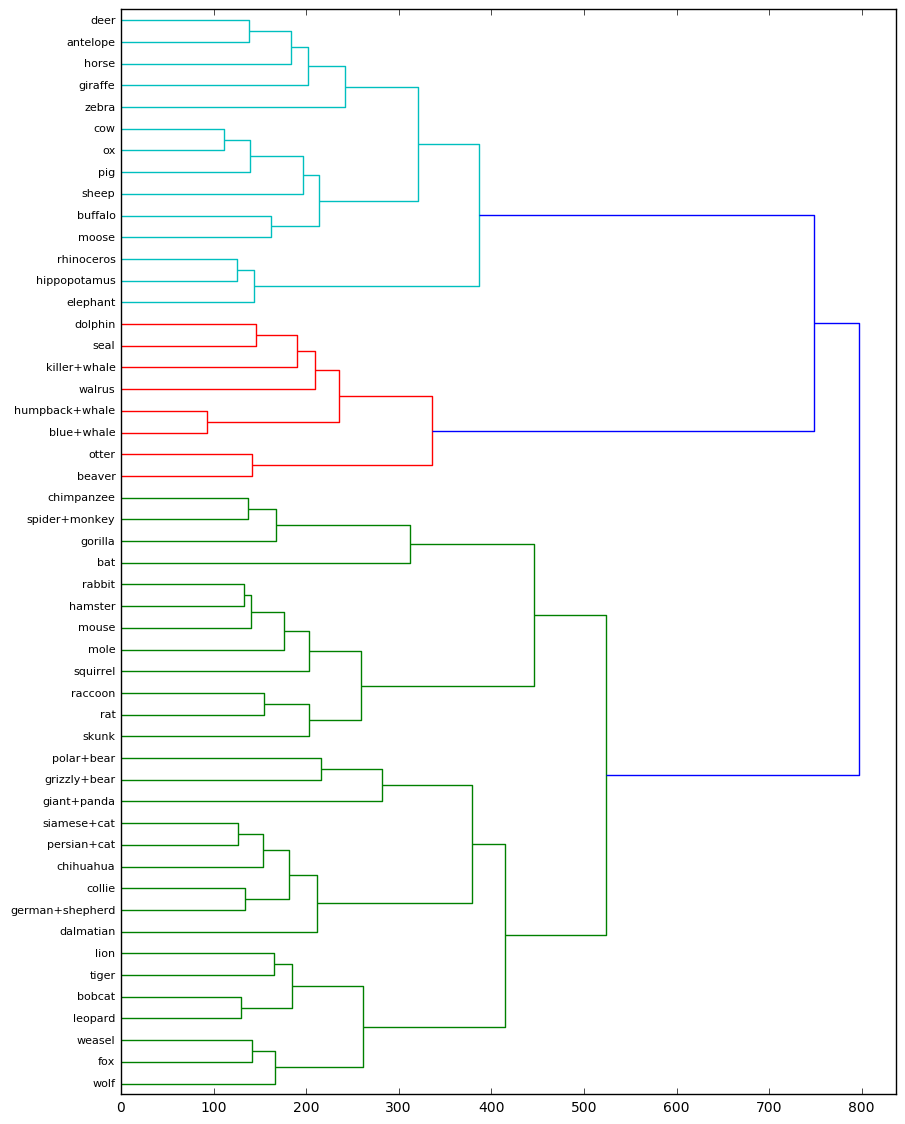

In [25]:
Z = hierarchy.linkage(predicate_matrix_continuous, 'ward',metric='euclidean')
hierarchy.dendrogram(Z,orientation='right',labels=animals_df['Animals'].values);
plt.show()

##### Hierarchy clustering makes sense except for few joins

#### Using PCA to plot the clustering for top 2 features

In [27]:
reduced_data = PCA(n_components=2).fit_transform(pred_mat_df)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

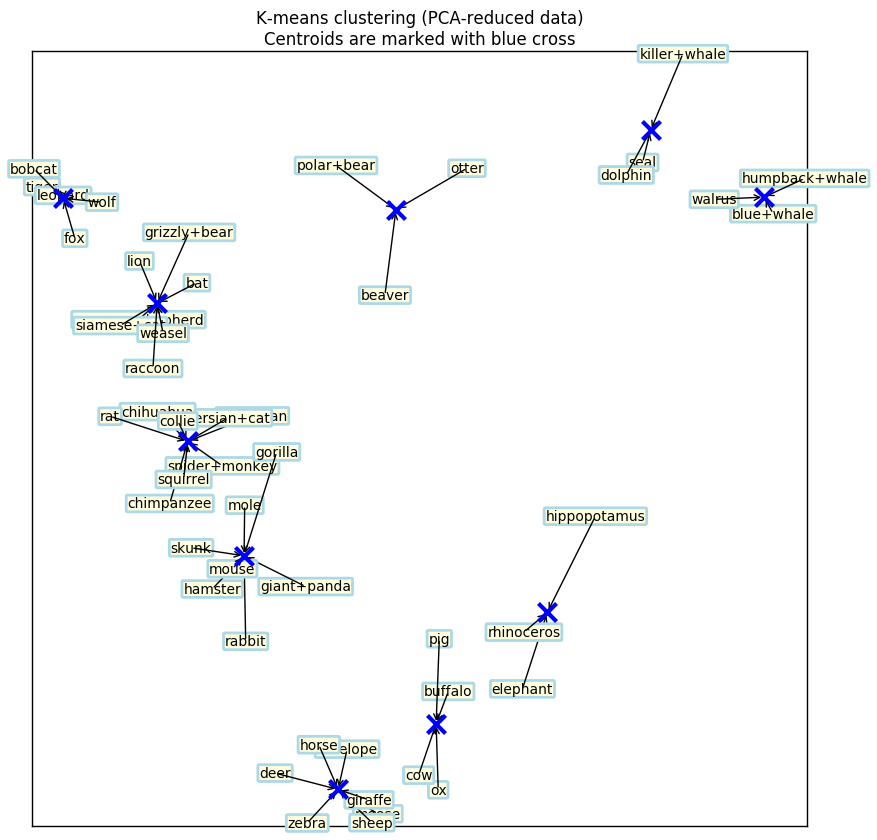

In [136]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
#plt.figure(1)
plt.clf()
#plt.imshow(Z, interpolation='nearest',
           #extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           #cmap=plt.cm.Paired,
           #aspect='auto', origin='upper')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], '*', markersize=8)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
#print centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)

for i, txt in enumerate(animals_df['Animals']):
    #print txt
    bbox_props = dict(boxstyle="round,pad=0.1", fc="lightyellow", ec="lightblue", lw=2)
    t = plt.text(reduced_data[:, 0][i], reduced_data[:, 1][i], txt, ha="center", va="center",size=10,bbox=bbox_props)
    #plt.annotate(txt, (reduced_data[:, 0][i]+1,reduced_data[:, 1][i]-5))
    #print txt
    #print animals_df[animals_df['Animals']==txt]['class'][0]
    #v=animals_df[animals_df['Animals']==txt].values[0][0]
    dis=1000
    dis_coords=[]
    for j in range(10):
        temp_coord = [centroids[:,0][j],centroids[:,1][j]]
        temp=euclidean_distances([[centroids[:,0][j],centroids[:,1][j]]], [[reduced_data[:,0][i], reduced_data[:,1][i]]])
        if temp < dis:
            dis = temp
            dis_coords = temp_coord
        
    plt.annotate("",xy=(dis_coords[0],dis_coords[1]),xytext=(reduced_data[:,0][i], reduced_data[:,1][i]),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with blue cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()